In [1]:
import numpy as np
np.random.seed(44)

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-dark-palette')
mpl.style.use('seaborn-whitegrid')
%matplotlib inline

import tensorflow as tf
# import tensorflow.contrib.eager as tfe
# tfe.enable_eager_execution()

from memory import Memory

from facenet.src import facenet

In [2]:
class Arguments(object):
    def __init__(self, model='20170512-110547', image_size=160):
        self.image_size = 160
        self.model = model
        
args = Arguments()

In [65]:
images = {}

for prefix in glob('facenet/datasets/faces_out/*'):
    character = prefix.split('/')[-1]
    images[character] = facenet.load_data(glob(prefix + '/*png'), False, False, args.image_size)

In [66]:
# for prefix in glob('facenet/datasets/faces_out/*'):
#     subpaths = glob(prefix + '/*')
#     for path in subpaths:
#         suffix = path.split('/')[-1][:-3]
#         new_file = '/'.join(path.split('/')[:-1]) + '/' + suffix + 'jpg'
#         ! convert $path $new_file

In [67]:
with tf.Graph().as_default():
    with tf.Session() as sess:
        facenet.load_model(args.model)
        
        images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
        embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
        phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")

        image_size = args.image_size
        embedding_size = embeddings.get_shape()[1]
        
        results = {}
        for character in images:
            feed_dict = {
                images_placeholder: images[character],
                phase_train_placeholder: False,
            }
            results[character] = sess.run(embeddings, feed_dict)

        


Model directory: 20170512-110547
Metagraph file: model-20170512-110547.meta
Checkpoint file: model-20170512-110547.ckpt-250000
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from 20170512-110547/model-20170512-110547.ckpt-250000


In [68]:
points = np.concatenate(results.values())

In [69]:
num_points = len(points)
dist_mat = np.zeros([num_points, num_points])

for i in range(num_points):
    point_a = points[i]
    for j in range(i+1, num_points):
        point_b = points[j]
        dist_mat[i, j] = np.linalg.norm(point_a - point_b)
    
dist_mat += dist_mat.T

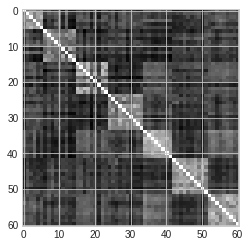

In [70]:
plt.imshow(dist_mat)

In [64]:
results.keys()

['avatar_male',
 'witkacy',
 'gollum',
 'witcher3',
 'hulk',
 'malczewski',
 'revision_info.txt',
 'bounding_boxes_25392.txt',
 'cesar']